**Business Problem**

A Businees manager of a consumer credit card is facing attrition. They want to analyze the data to find out the resson behind this and leverage the same to predict cusotomers who are likely to drop off. They also to predict customers  churn from the dataset and gain some insight on how the bank can reduce the customers who have churned. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
import pandas as pd
bank = pd.read_csv('/content/drive/MyDrive/Digital Skola/Dataset/credit_card_churn.csv')

In [ ]:
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
bank.shape

(10127, 23)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# drop unneeded columns

bank = bank.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                 ,"CLIENTNUM"],
                axis=1)

In [ ]:
#checking null values

bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#check data duplication
bank.duplicated().sum()
bank.drop_duplicates(inplace=True)
bank.shape

(10127, 20)

**Exploratorv Data Analysis and Data Visualization**

In [ ]:
bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

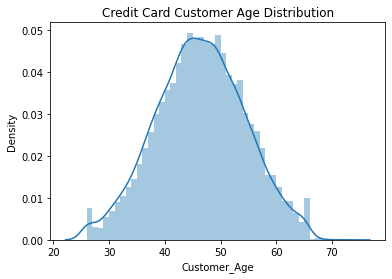

In [ ]:
sns.distplot(bank['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

* Customer age is normally distributed.
* Most of the customer age are clustered around the mean value (between 40 to 60).

In [ ]:
bank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


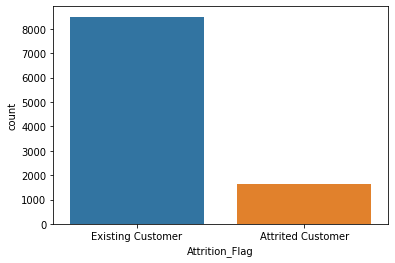

In [ ]:
# data is severly imbalanced so we will apply SMOTE to balance it

sns.countplot("Attrition_Flag",data=bank)

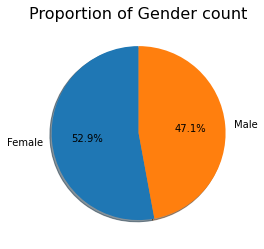

In [ ]:
plt.pie(bank['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

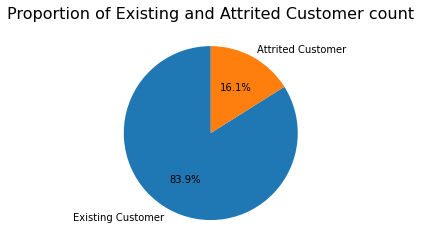

In [ ]:
plt.pie(bank['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Existing and Attrted Customers by Gender')

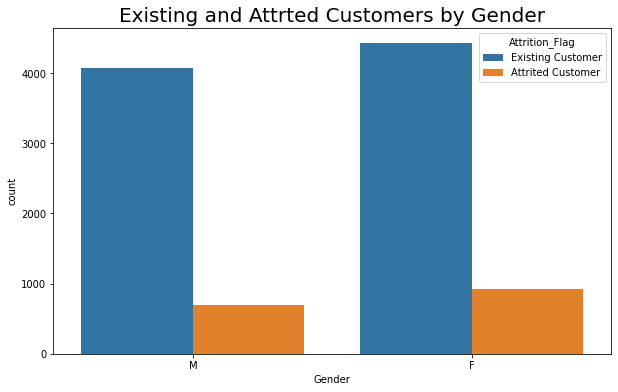

In [ ]:
#visualize to see the number of existing and attrited customers by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=bank)
plt.title('Existing and Attrted Customers by Gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Gender')

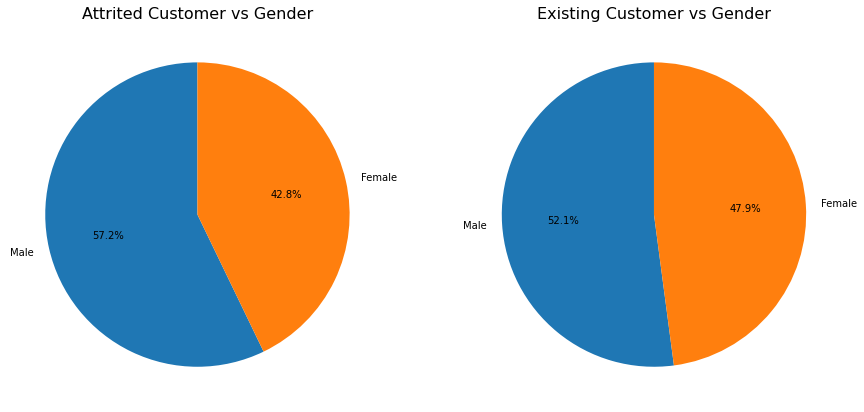

In [ ]:
# visualize to see the proportion of existing and attrited customers by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

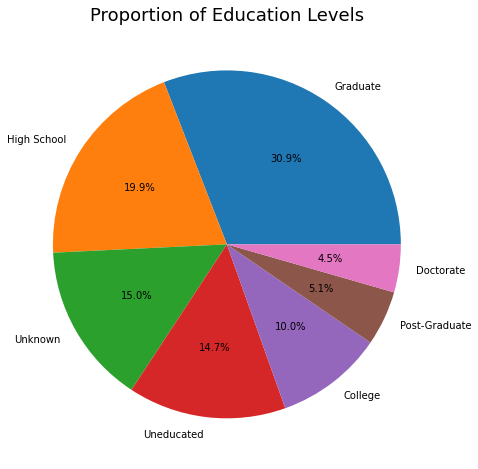

In [ ]:
edu = bank['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Existing Customer vs Education Level')

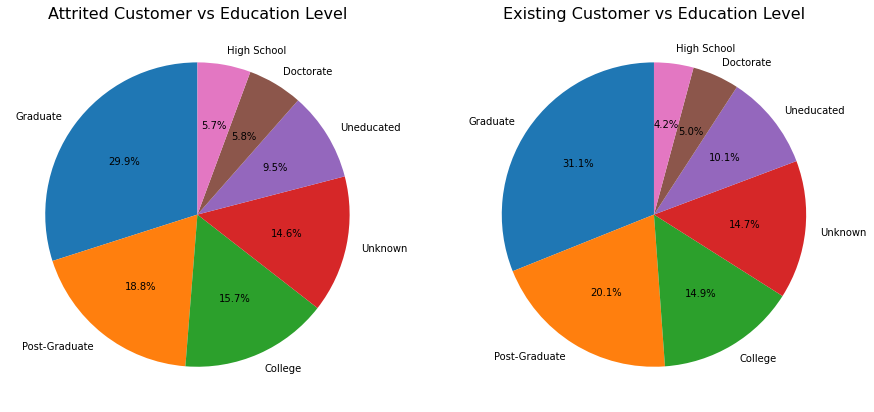

In [ ]:
# Proportion of education level by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_edu = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Education Level', fontsize=16)

existing_edu = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Education Level', fontsize=16)

Text(0.5, 1.0, 'Male vs Education Level')

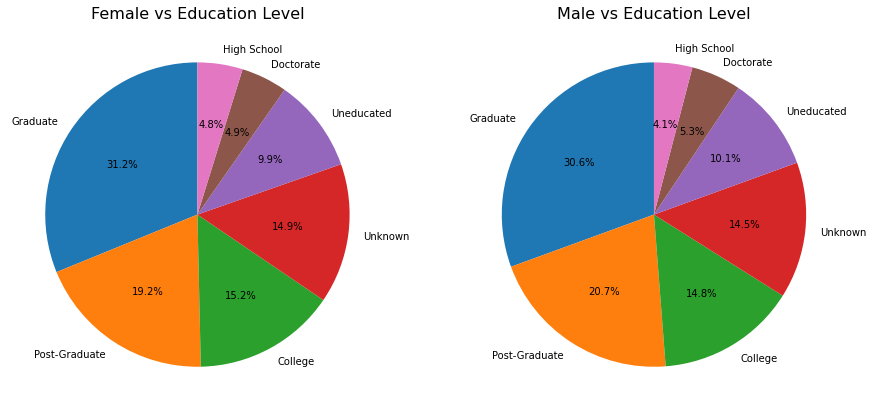

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = bank.loc[bank["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = bank.loc[bank["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)

Text(0.5, 1.0, 'Education Level by gender')

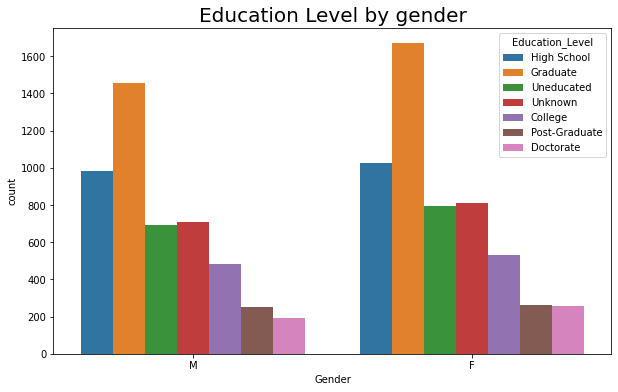

In [ ]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=bank)
plt.title('Education Level by gender', fontsize=20)

In [ ]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Existing Customer vs Marital_Status')

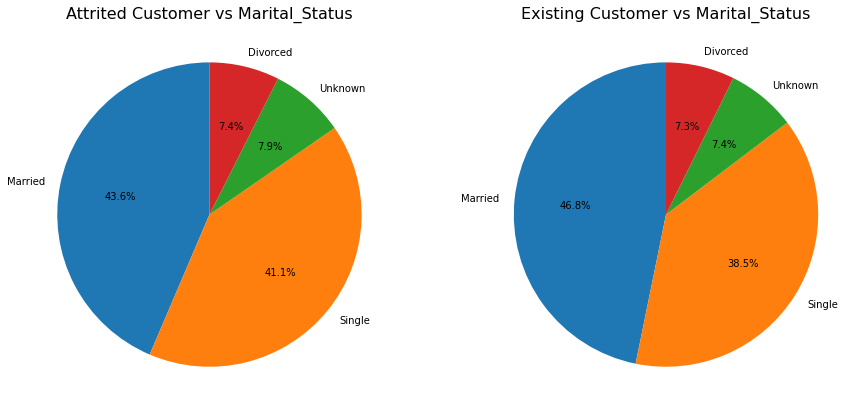

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_mar = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
ax1.pie(x=attrited_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Marital_Status', fontsize=16)

existing_mar = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
ax2.pie(x=existing_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Marital_Status', fontsize=16)

Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

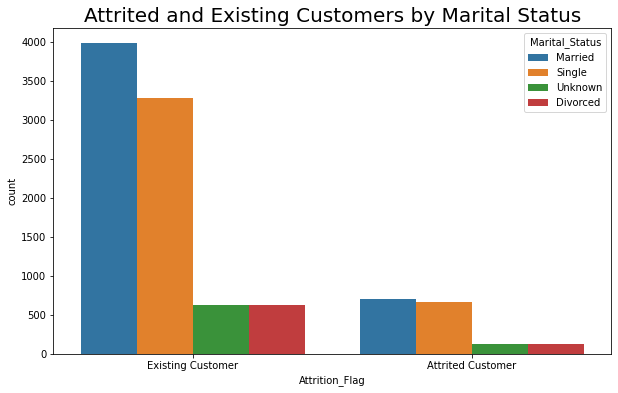

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=bank)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)

In [ ]:
import collections

Text(0.5, 1.0, 'Existing Customer vs Income_Category')

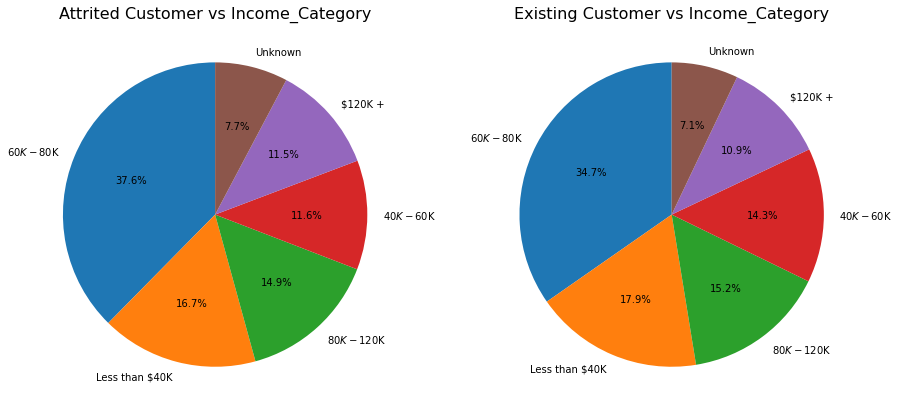

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
count = collections.Counter(bank['Income_Category'])

attrited_inc = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income_Category', fontsize=16)

existing_inc = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income_Category', fontsize=16)

In [ ]:
#exploring Income category column

bank["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


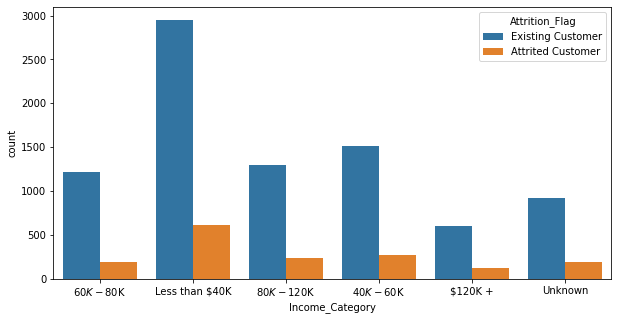

In [ ]:
#EDA for Income category

plt.figure(figsize=(10,5))
sns.countplot("Income_Category",hue="Attrition_Flag",data=bank)

In [ ]:
#replace Attrition_Flag to numerical values

bank["Attrition_Flag"].replace(to_replace = ["Existing Customer","Attrited Customer"],value=[1,0],inplace=True)

In [ ]:
bank["Attrition_Flag"].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
bank.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# onehot encoding for categorical columns

bank = pd.get_dummies(data=bank,columns=["Gender","Education_Level","Marital_Status","Income_Category",
                                         "Card_Category"]
                      ,drop_first=True)

In [ ]:
#heatmap for correlation 

import seaborn as sns
import matplotlib.pyplot as plt

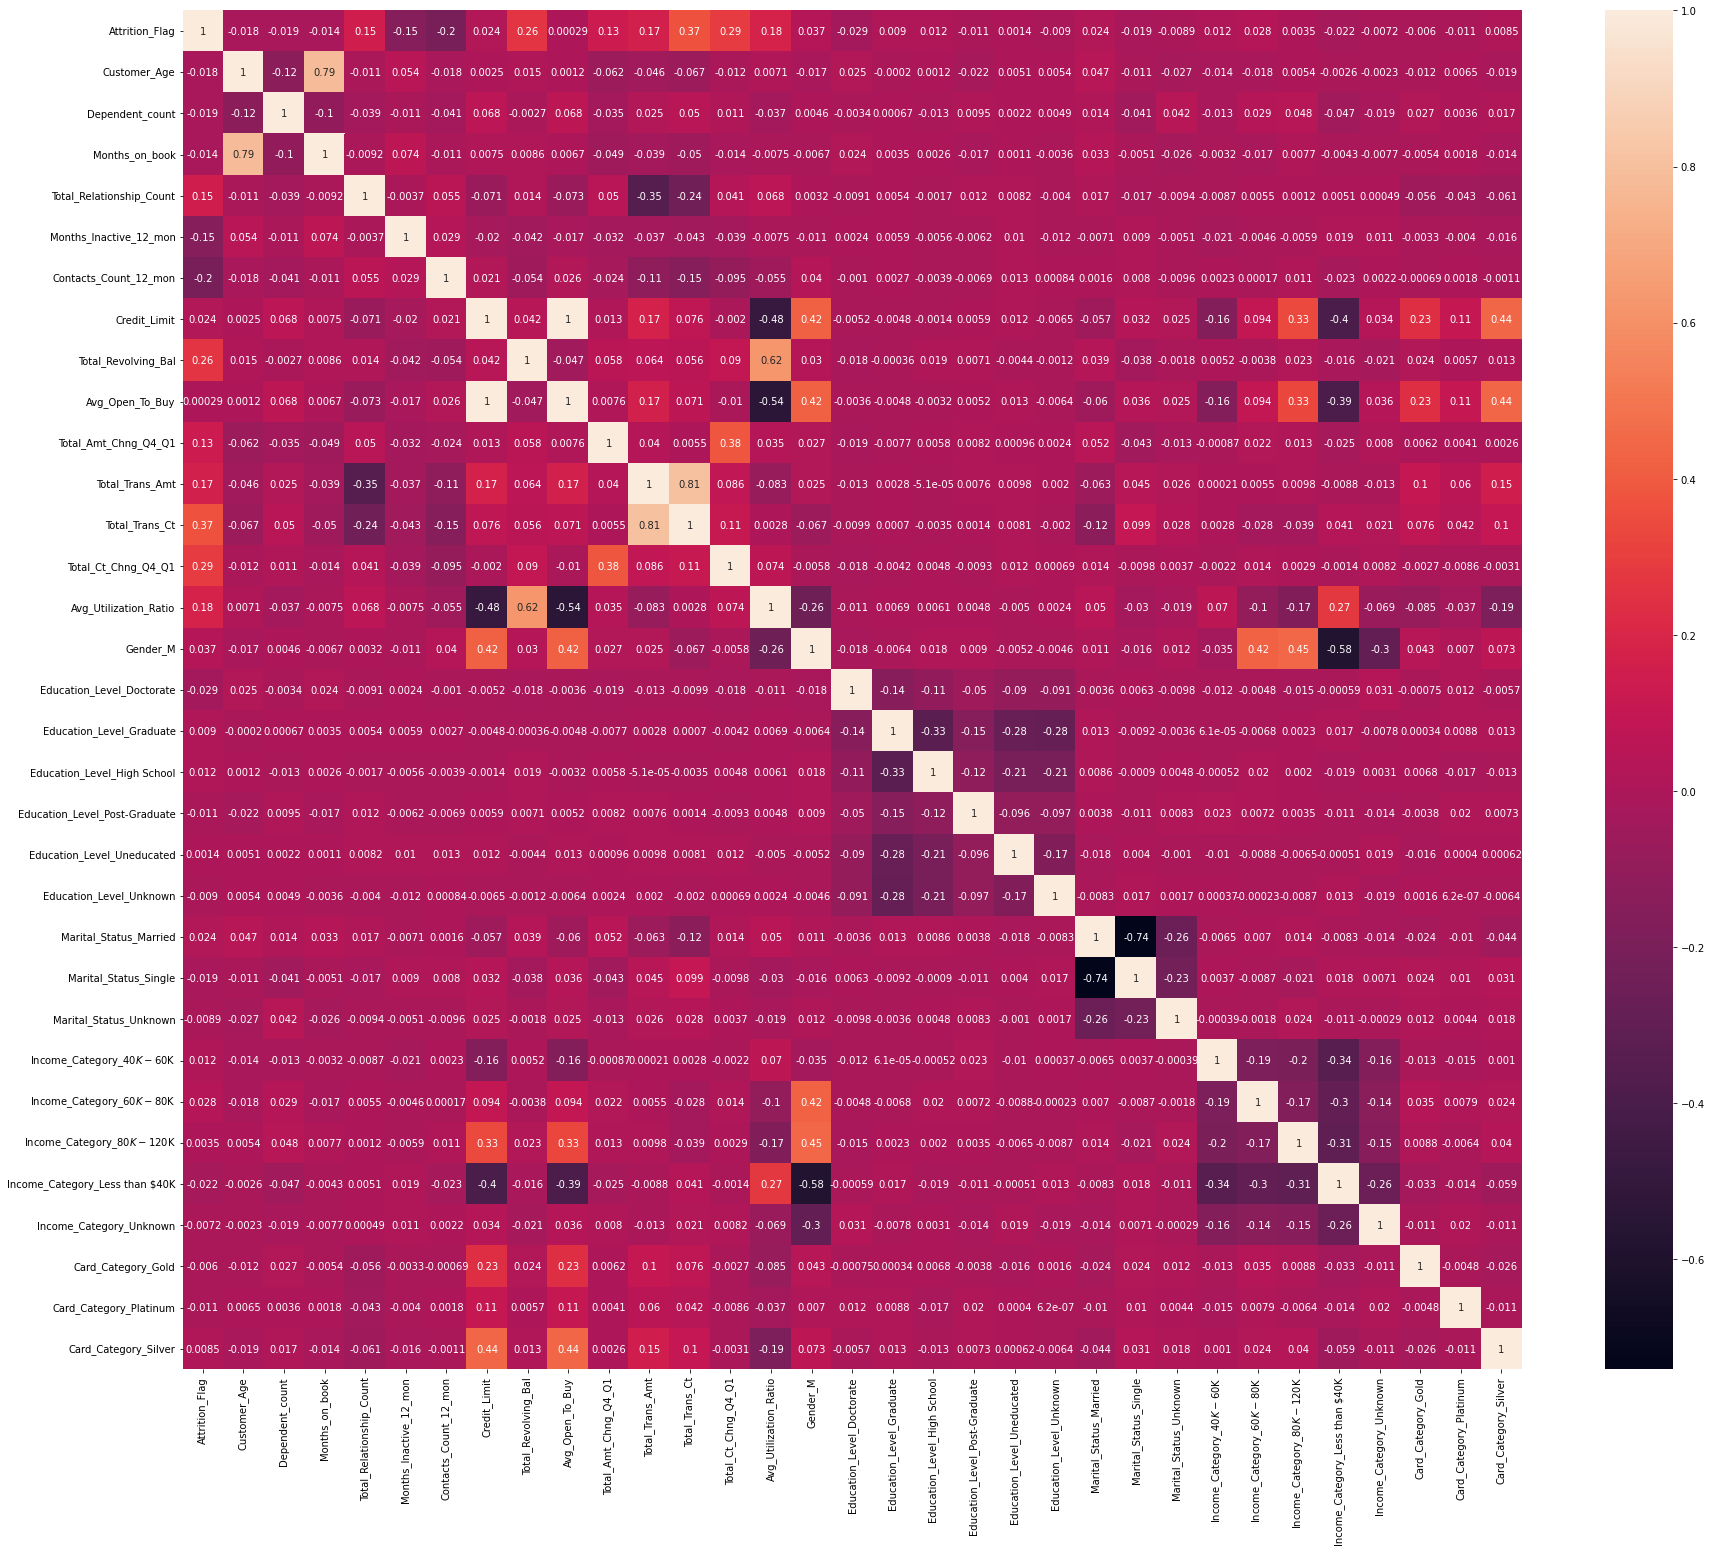

In [ ]:
plt.figure(figsize= (30,25))

sns.heatmap(bank.corr(),annot = True)

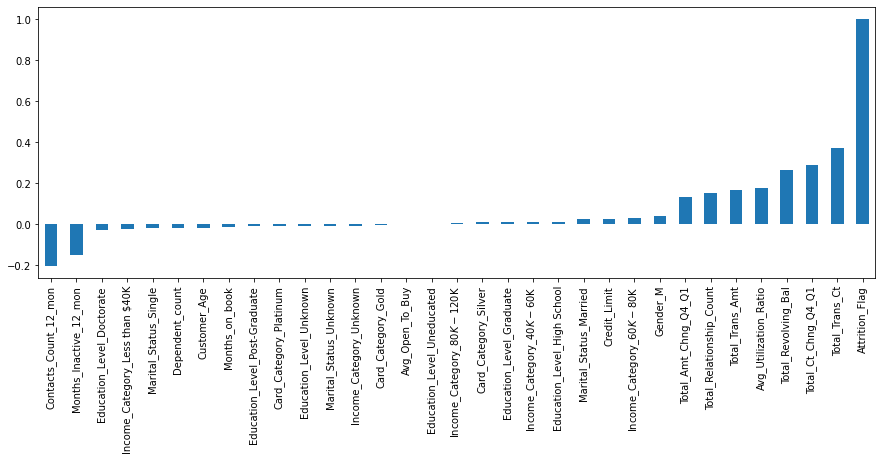

In [ ]:
#checking correlation of attrition_flag with other fields
plt.figure(figsize=(15,5))
bank.corr()["Attrition_Flag"].sort_values().plot(kind="bar")

* There are multicollinearity between Total Transaction Amount and Total Transaction Count, Total Revolving Balance and Average Card Utilization Ratio, 
* We will drop total transaction amount and Average card utilization 


In [ ]:
bank.drop(columns = ["Total_Trans_Amt","Avg_Utilization_Ratio" ], inplace = True)

In [ ]:
X = bank.drop("Attrition_Flag",axis=1)
y = y= bank["Attrition_Flag"]

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
counter = Counter(y)
print(counter)

Counter({1: 8500, 0: 1627})


In [ ]:
# do train test split for features and labels 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
# perform Standard Scaling and SMOTE to handle imbalance between data 


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Balancing data

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
counter = Counter(y)
print(counter)

Counter({1: 8500, 0: 8500})


In [ ]:
# checking training sample numbers for Label ( attrition flag)
print(Counter(y_train))

Counter({1: 5963, 0: 1125})


In [ ]:
#Try building model with XGBoost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
#Predicting the test set

y_pred = xgb.predict(X_test)

In [ ]:
# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import classification_report , accuracy_score, roc_auc_score
from sklearn import metrics

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

print(roc_auc_score(y_test, y_pred))


0.9322145442579796
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       502
           1       0.94      0.98      0.96      2537

    accuracy                           0.93      3039
   macro avg       0.90      0.84      0.87      3039
weighted avg       0.93      0.93      0.93      3039

0.839560952092301


In [ ]:
#Try building model with Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)


#model.feature_importances_

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       502
           1       0.94      0.99      0.96      2537

    accuracy                           0.93      3039
   macro avg       0.92      0.82      0.86      3039
weighted avg       0.93      0.93      0.93      3039



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       502
           1       0.94      0.99      0.96      2537

    accuracy                           0.93      3039
   macro avg       0.92      0.82      0.86      3039
weighted avg       0.93      0.93      0.93      3039



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.8211960985384438


In [ ]:
# trying Support Vector Machines

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 277  225]
 [  43 2494]]
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       502
           1       0.92      0.98      0.95      2537

    accuracy                           0.91      3039
   macro avg       0.89      0.77      0.81      3039
weighted avg       0.91      0.91      0.90      3039



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.7126835945309977


Model Tuning

In [ ]:
#perform grid Search CV to find best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {"n_estimators": [10,50,100,200],"max_features" : ["auto", "sqrt", "log2"],
         "criterion" : ["gini", "entropy"]}

In [ ]:
# add estimator and perform grid search CV

grid = GridSearchCV(RandomForestClassifier(),param_grid=param,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.5s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_features=auto, n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,grid_pred)) # c00: TN, , c01:FP, c10: FN, c11: TP  
print(classification_report(y_test,grid_pred))

[[2429  101]
 [ 109 2461]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2530
           1       0.96      0.96      0.96      2570

    accuracy                           0.96      5100
   macro avg       0.96      0.96      0.96      5100
weighted avg       0.96      0.96      0.96      5100



In [ ]:
cm = confusion_matrix(y_test,grid_pred)

In [ ]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) #TP/(TP+FN)
specificity = cm[0,0]/(cm[0,0]+cm[0,1]) #TN/(TN+FP)

**Conclusion**

* Based on  several models, Random Forest has the best value for classifying, with an accuracy value 0.93 and precision value of 0.90 for Existing Customers and 0.94 for  Attrited Customer.

* From the results of the correlation coefficient, the  variable  have negative effect  to Atrrition Flag is customers who have been inactive in last 12 months, so I recommend managers to approach customers who are inactive by providing promotional offers such as discont and small interest .
